In [24]:
from tensorflow.keras.models import load_model
model = load_model("best_bitcoin_model.keras", compile=False)


In [25]:
def predict_future(model, last_sequence, scaler, n_steps=10):
    future_preds = []
    input_seq = last_sequence.copy()

    for _ in range(n_steps):
        # Reshape for model input
        input_array = np.array(input_seq[-window_size:]).reshape(1, window_size, 1)
        pred = model.predict(input_array)[0][0]
        future_preds.append(pred)
        input_seq = np.append(input_seq, pred)

    # Convert scaled predictions back to actual prices
    future_preds = np.array(future_preds).reshape(-1, 1)
    future_prices = scaler.inverse_transform(future_preds)

    return future_prices.flatten()


In [ ]:

# Load model and scaler
import numpy as np
import pandas as pd
import joblib

df = pd.read_csv("formatted_output.csv")  # Load your dataset


df = df.sort_values("timeOpen")
from sklearn.preprocessing import MinMaxScaler

# Use last 500 rows for training
recent_df = df.tail(500)
prices = recent_df["priceClose"].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

# Prepare last sequence
window_size = 30
last_sequence = scaled_prices[-window_size:].flatten()
future_prices = predict_future(model, last_sequence, scaler, n_steps=30)

for i, price in enumerate(future_prices, 1):
    print(f"Day {i}: ${price:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [54]:

print("Predicted future Bitcoin prices:", future_prices.flatten())


Predicted future Bitcoin prices: [116254.93  116075.21  116249.55  116490.92  116670.99  116749.234
 116738.99  116677.38  116602.59  116541.16  116504.74  116492.75
 116497.64  116510.336 116523.51  116532.78  116537.03  116537.28
 116535.25  116532.59  116530.305 116528.73  116528.01  116527.87
 116527.98  116527.95  116527.6   116526.96  116526.07  116525.11 ]


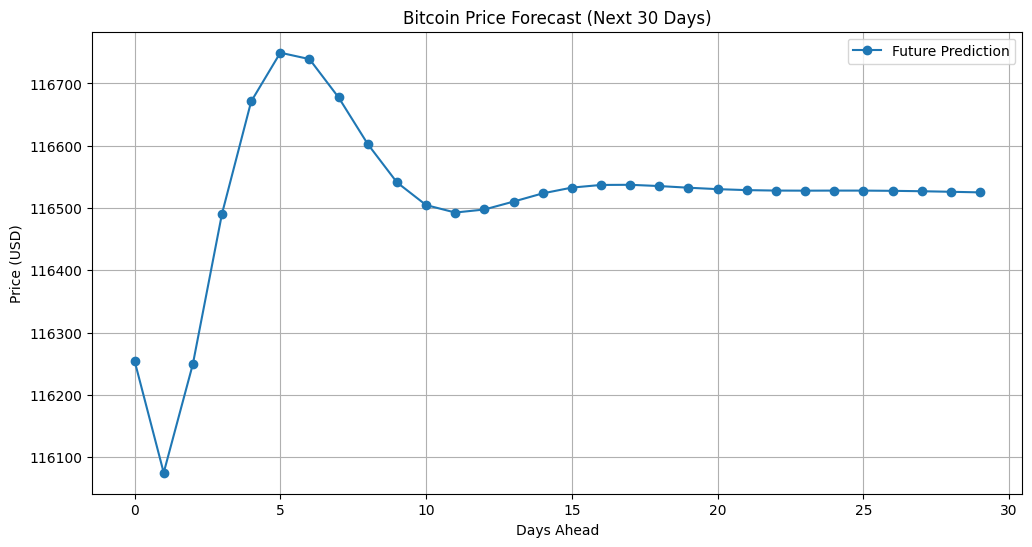

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(future_prices, marker='o', label="Future Prediction")
plt.title("Bitcoin Price Forecast (Next 30 Days)")
plt.xlabel("Days Ahead")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()
